# DATA CLEANING
### Fraud Detection System Development using Deep Neural Network for Reported Transactional Data in DANA

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

#### Import Raw CSV File with filtered data source

In [45]:
df = pd.read_csv('user_data_dropped.csv', sep=';')

In [46]:
df.head()

,uid,is_scammer,source,trx_date,report_date,registereddate,birthday,gender,job_position,is_verified,...,dormancy_count_trx,kyc_total_failed,kyc_total_revoked,avg_topup_weight_1,avg_x2x_weight_1,avg_other_weight_1,centrality_outdegree_p2p,centrality_indegree_p2p,centrality_undirected_p2p,centrality_outdegree_sendmoney
0,208cc2b1-7e8c-43d2-ba9f-32269abdf078,0,CS_REPORT_VICTIM,30/01/2023,02/02/2023,01/02/2021,01/04/1906,Male,PERDAGANGAN,1,...,446,10.0,0.0,79479167,290885417,31666667,5.017881e+09,2.826975e+09,5.088555e+09,3.265201e+08
1,afbeffbd-b905-4323-ac1a-3ba3e07f6951,1,CS_REPORT_SCAMMER,14/01/2023,22/01/2023,01/09/2019,01/01/1930,Female,WIRASWASTA,1,...,986,0.0,0.0,11484375,118802083,93958333,6.360694e+08,4.947206e+07,1.130790e+10,2.285641e+09
2,24b253b8-84b4-42d4-92b0-7b8537d4f066,1,CS_REPORT_SCAMMER,10/10/2021,15/10/2021,01/05/2021,01/07/1930,Female,PETANI / PEKEBUN,1,...,401,20.0,0.0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,32414559-95f1-48fd-83ff-1ff7cc711d88,1,INCOMPLETE_CS_REPORT_SCAMMER,08/02/2023,08/02/2023,01/01/2023,01/03/1931,Male,BURUH HARIAN LEPAS,1,...,40,0.0,0.0,10416667,29583333,175,7.067437e+07,2.120231e+08,2.826975e+09,3.265201e+09
4,80126b5b-7219-4266-b94b-85620d0b4498,1,INCOMPLETE_CS_REPORT_SCAMMER,06/02/2023,06/02/2023,01/09/2022,01/07/1933,Male,BURUH TANI / PERKEBUNAN,1,...,575,30.0,0.0,33697917,80416667,415625,0.000000e+00,2.699761e+10,2.699761e+10,9.795603e+07


In [47]:
df.isna().sum()

uid                                   0
is_scammer                            0
source                                0
trx_date                              0
report_date                           0
registereddate                        0
birthday                              0
gender                                0
job_position                          0
is_verified                           0
aqc_freq_prepaid_mobile               0
aqc_mean_prepaid_mobile_amount        0
aqc_freq_topup                        0
aqc_freq_topup_within_7d              0
aqc_mean_topup_amount                 0
aqc_mean_topup_amount_7d              0
aqc_mean_topup_amount_30d             0
aqc_mean_topup_amount_90d             0
aqc_total_topup_amount_7d             0
aqc_total_topup_amount_90d            0
aqc_freq_x2x                          0
aqc_freq_x2x_within_60d               0
aqc_freq_x2x_within_90d               0
aqc_mean_x2x_amount                   0
aqc_mean_x2x_amount_7d                0


#### Begin Cleaning Here

In [48]:
# Drop uid column
df1 = df.drop(columns=['uid'])

In [49]:
# One-hot Encoding for df['source']
df1['source'].value_counts()

CS_REPORT_SCAMMER               12577
CS_REPORT_VICTIM                11353
INCOMPLETE_CS_REPORT_VICTIM     10367
INCOMPLETE_CS_REPORT_SCAMMER     8562
Name: source, dtype: int64

In [50]:
# df['trx_date'] change to integer
df1['trx_date'] = pd.to_datetime(df1['trx_date'])
df1['trx_date'] = (df1['trx_date'] - np.datetime64(0, 'Y')).dt.days

In [51]:
# df['report_date'] change to integer
df1['report_date'] = pd.to_datetime(df1['report_date'])
df1['report_date'] = (df1['report_date'] - np.datetime64(0, 'Y')).dt.days

In [52]:
# df['registereddate'] null to np.datetime64('1970')
# df['registereddate'] change to integer
df1['registereddate'] = pd.to_datetime(df1['registereddate'])
df1['registereddate'] = (df1['registereddate'] - np.datetime64(0, 'Y')).dt.days

#### Need Update

In [53]:
# Handle corrupt birthday data '#'*256 to np.nan
# Commented: Make new feature 'birthday_valid' value 1 when 'birthday' is not nan, else 0
# df['birthday'] null to median/mean value
# df['birthday'] change to integer

# Done in Excel
# df1['birthday'] = df1['birthday'].replace('#'*255, np.nan)
# df1['birthday'] = df1['birthday'].fillna(np.datetime64('0000'))

# df1.loc[df1['birthday'].notnull(), 'birthday_valid'] = 1
# df1.loc[df1['birthday'].isnull(), 'birthday_valid'] = 0

df1['birthday'] = pd.to_datetime(df1['birthday'])
df1['birthday'] = (df1['birthday'] - np.datetime64(0, 'Y')).dt.days

In [43]:
# df['gender'] null to 'Null'

# Done in Excel
# df1['gender'] = df1['gender'].fillna('Null')

In [54]:
# df['dormancy_max_gmt_pay_diff_days'] null --> 0
# df['dormancy_mean_gmt_pay_diff_days'] null --> 0
df1['dormancy_max_gmt_pay_diff_days'] = df1['dormancy_max_gmt_pay_diff_days'].fillna(0)
df1['dormancy_mean_gmt_pay_diff_days'] = df1['dormancy_mean_gmt_pay_diff_days'].fillna(0)

In [55]:
# df['kyc_total_failed'] null --> 0
# df['kyc_total_revoked'] null --> 0
df1['kyc_total_failed'] = df1['kyc_total_failed'].fillna(0)
df1['kyc_total_revoked'] = df1['kyc_total_revoked'].fillna(0)

In [56]:
# df['job_position'] perbaiki typo
# df['job_position'] null --> 'LAINNYA'
# df['job_position'] kelompokkan menjadi RumahTangga, Pelajar, TidakBekerja, Wiraswasta, Spesialis, Karyawan, PegawaiNS, Lainnya
# 159 --> 8 Unique job entries
df2 = df1.copy()

In [57]:
# Done in Excel
# df2['job_position'] = df2['job_position'].fillna('LAINNYA')

df2['job_position'] = df2['job_position'].str.replace(" ", "")
df2['job_position'] = df2['job_position'].str.replace("/", "")

karyawan = [r'(.*(?:KARYAWAN).*)', r'(.*(?:BURUH).*)', 'PILOT', 'PELAUT', 'PETANIPEKEBUN', 'PETERNAK', 'NELAYANPERIKANAN', 'SOPIR', 'AKUNTAN', 'TRANSPORTASI', 'PENATARIAS', 'PENATARAMBUT', 'PENATABUSANA', 'PENGEMUDI', 'PENYIARTELEVISI', 'PENYIARRADIO']
tidak_kerja = [r'(.*(?:TIDAK).*)', r'(.*(?:BELUM).*)', 'PENSIUNAN', 'PENSIUN']
pelajar = [r'(.*(?:PELAJAR).*)']
wiraswasta = [r'(.*(?:SWASTA).*)', r'(.*(?:WIRA).*)', 'PERDAGANGAN', 'INDUSTRI', 'KONSTRUKSI', 'PEDAGANG', 'WIASRWASTA']
spesialis = [r'(.*(?:TUKANG).*)', 'GURU', 'DOSEN', 'BIDAN', 'DOKTER', 'WARTAWAN', 'APOTEKER', 'PERAWAT', 'PENGACARA', 'PENELITI', 'PARAJI', 'KONSULTAN', 'PERANCANGBUSANA', 'HAKIM', 'ARSITEK', 'PENTERJEMAH', 'JURUMASAK', 'MEKANIK', 'NOTARIS']
pns = [r'(.*(?:BUMN).*)', r'(.*(?:BUMD).*)', r'(.*(?:ANGGOTA).*)', 'PERANGKATDESA', 'PEGAWAINEGERISIPIL', 'KEPOLISIANRI', 'GUBERNUR', 'TENTARANASIONALINDONESIA', 'KEPALADESA', 'WALIKOTA', 'BUPATI', 'DUTABESAR']
rumahtangga = [r'(.*(?:RUMAH).*)']
lainnya = [r'(.*(?:LAIN).*)', r'^[A-Z0-9]{0,3}$', 'SENIMAN', 'TABIB', 'USTADZMUBALIGH', 'OHTERS', 'OTHERS', 'PASTUR', 'PARANORMAL', 'PIALANG', 'IMAMMASJID', 'PENDETA', 'BIARAWATI']

df2['job_position'] = df2['job_position'].replace(lainnya, 'LAINNYA', regex = True)
df2['job_position'] = df2['job_position'].replace(pns, 'PEGAWAI_NS', regex = True)
df2['job_position'] = df2['job_position'].replace(pelajar, 'PELAJAR', regex = True)
df2['job_position'] = df2['job_position'].replace(karyawan, 'KARYAWAN', regex = True)
df2['job_position'] = df2['job_position'].replace(wiraswasta, 'WIRASWASTA', regex = True)
df2['job_position'] = df2['job_position'].replace(spesialis, 'SPESIALIS', regex = True)
df2['job_position'] = df2['job_position'].replace(rumahtangga, 'RUMAH_TANGGA', regex = True)
df2['job_position'] = df2['job_position'].replace(tidak_kerja, 'TIDAK_KERJA', regex = True)

In [58]:
print(df2['job_position'].value_counts())
print("Unique Job Positions: ", len(df2['job_position'].unique()))

PELAJAR         16845
LAINNYA          6250
KARYAWAN         6158
RUMAH_TANGGA     5421
TIDAK_KERJA      4574
WIRASWASTA       3086
PEGAWAI_NS        288
SPESIALIS         237
Name: job_position, dtype: int64
Unique Job Positions:  8


#### Display Relational HeatMap of Cleaned Data

In [59]:
df3 = df2.copy()
categorical_columns = ['source','gender','job_position']
df3 = pd.get_dummies(df3, columns = categorical_columns)

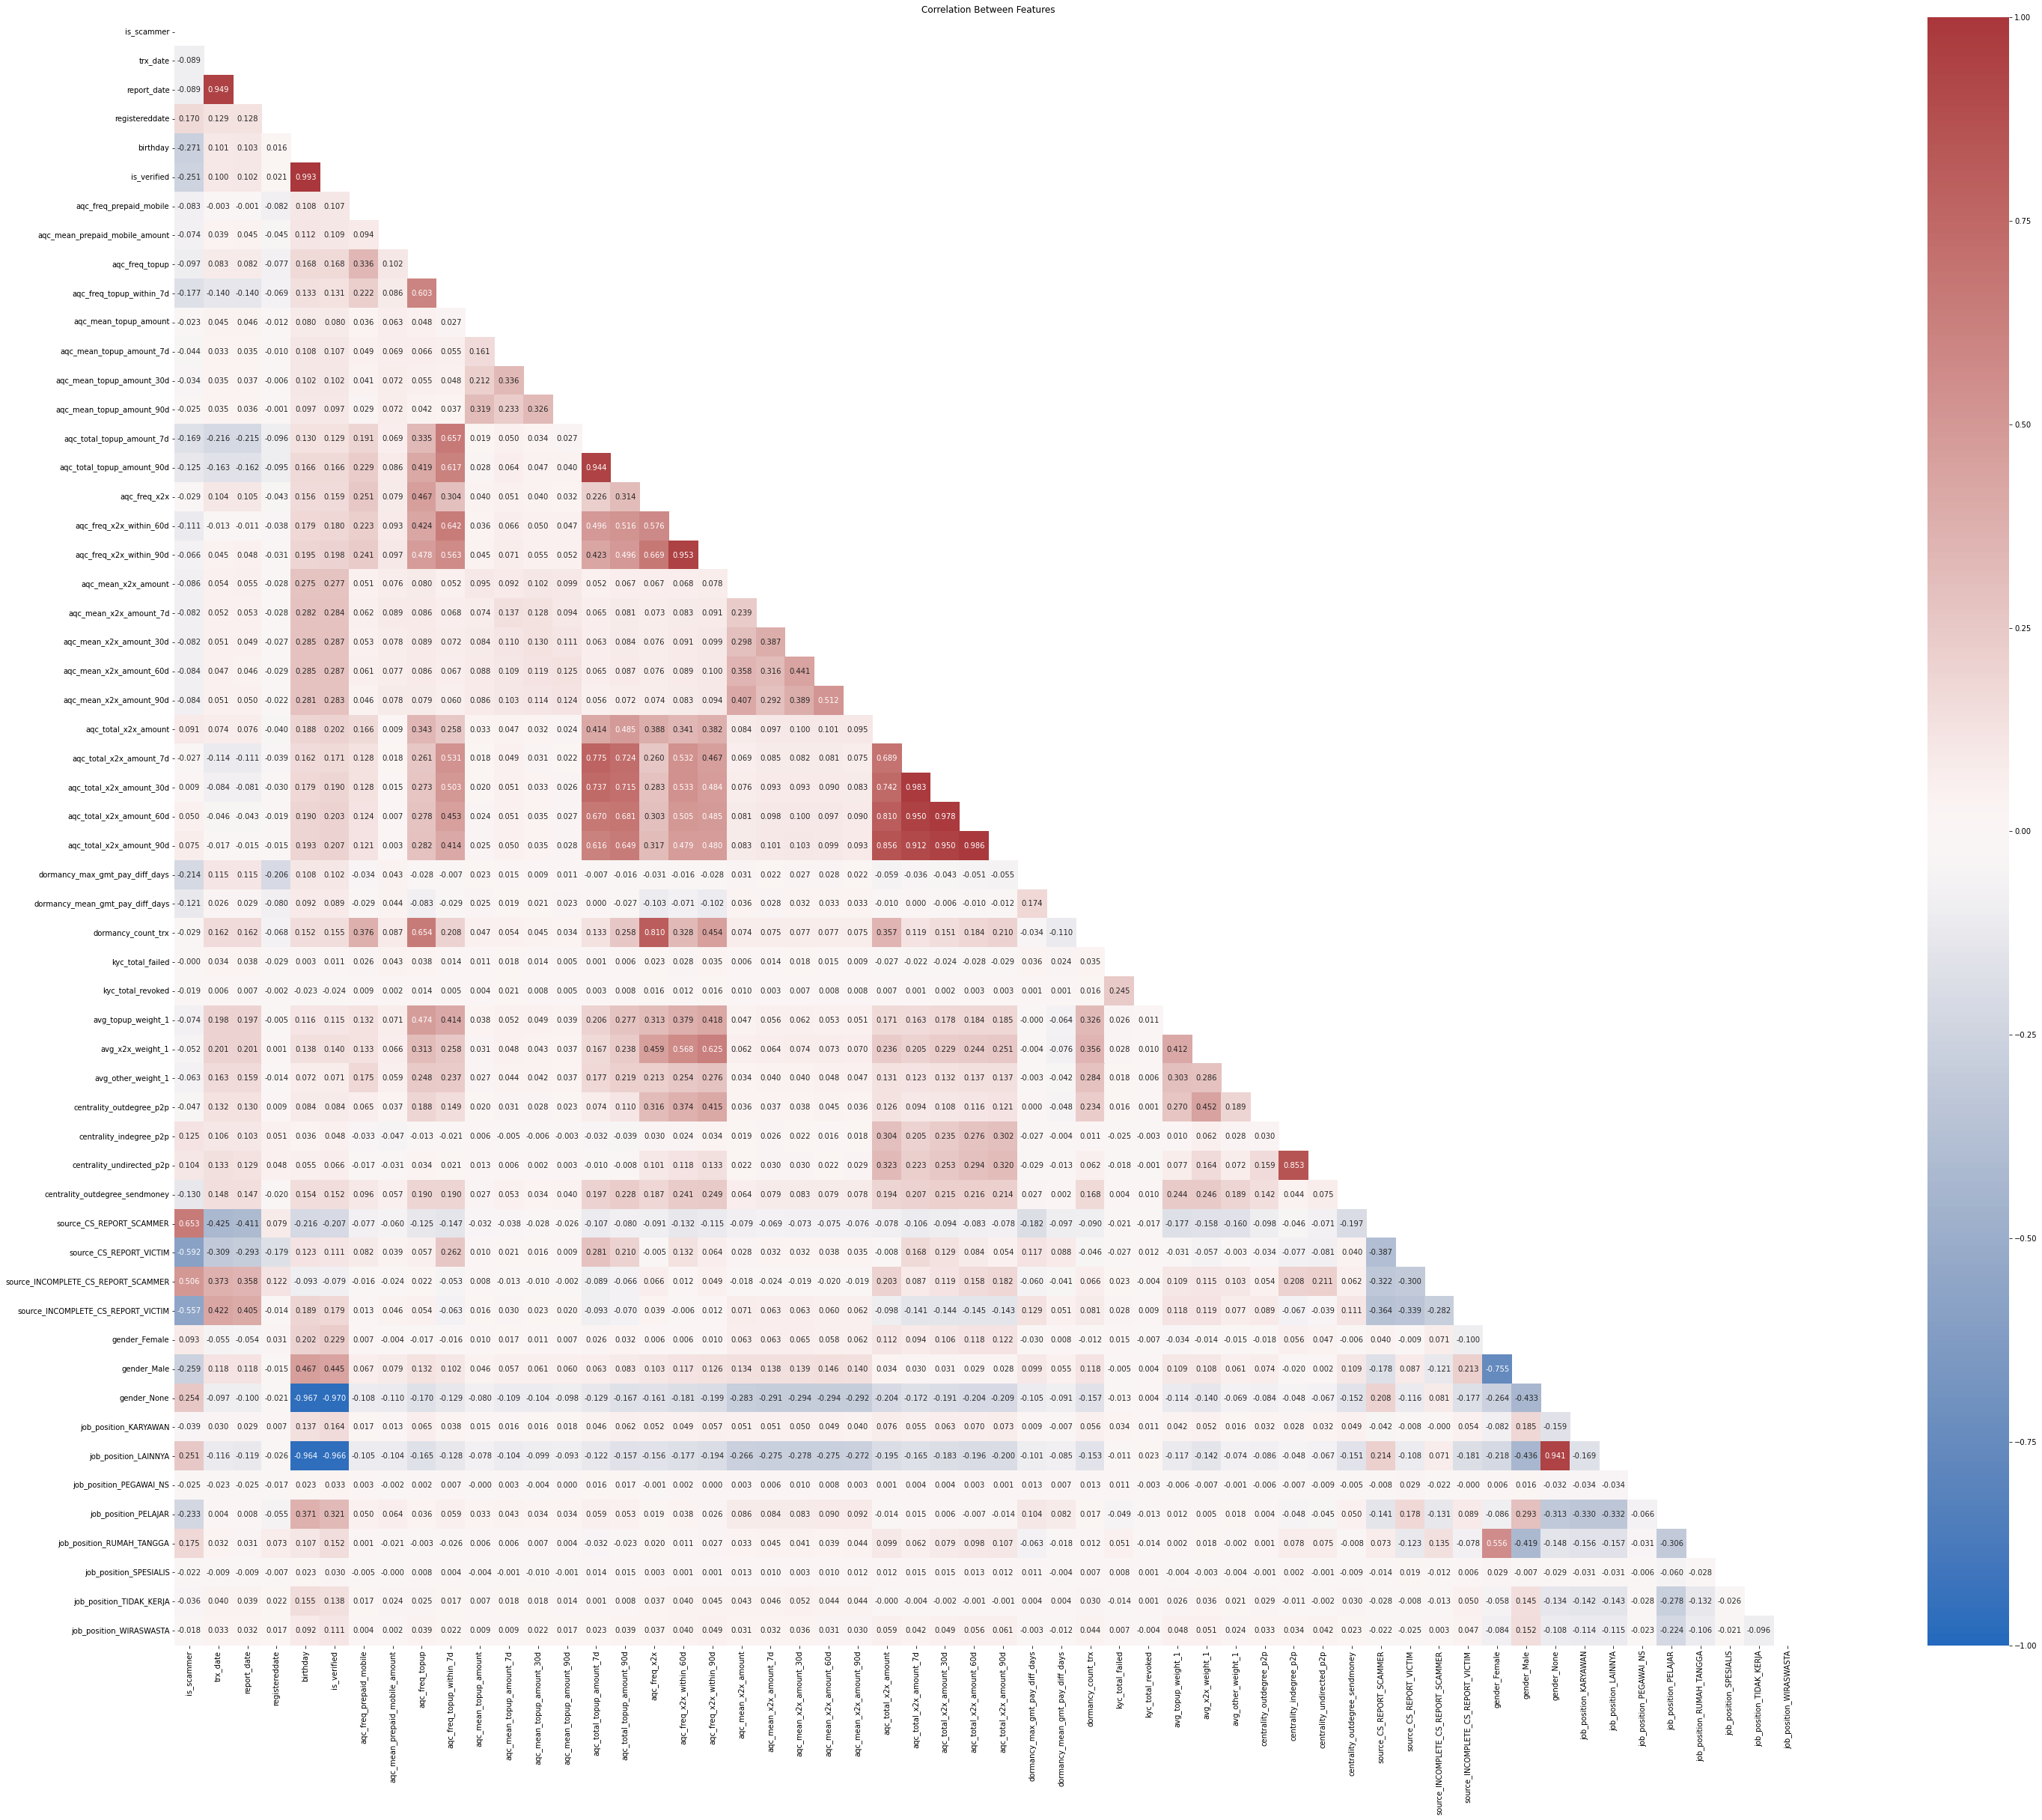

In [60]:
# Check Correlation of Features, then Make Relational Map
corr_column = df3.select_dtypes(include=[np.number]).columns.to_list()

fig = plt.figure(figsize=(60,40))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Correlation Between Features')

mask = np.triu(np.ones_like(
    df3[corr_column].corr(), dtype=np.bool))

sns.heatmap(df3[corr_column].corr(),
            vmin=-1, vmax=1, cmap='vlag', annot=True, fmt='.3f', mask=mask,
            annot_kws = {'fontsize': 10, 'fontweight':'roman'},
            square=True)

plt.show()

In [61]:
# Another Visual Representation
score_corr = df3[corr_column].corr()
score_corr.style.background_gradient(cmap='vlag')

,is_scammer,trx_date,report_date,registereddate,birthday,is_verified,aqc_freq_prepaid_mobile,aqc_mean_prepaid_mobile_amount,aqc_freq_topup,aqc_freq_topup_within_7d,aqc_mean_topup_amount,aqc_mean_topup_amount_7d,aqc_mean_topup_amount_30d,aqc_mean_topup_amount_90d,aqc_total_topup_amount_7d,aqc_total_topup_amount_90d,aqc_freq_x2x,aqc_freq_x2x_within_60d,aqc_freq_x2x_within_90d,aqc_mean_x2x_amount,aqc_mean_x2x_amount_7d,aqc_mean_x2x_amount_30d,aqc_mean_x2x_amount_60d,aqc_mean_x2x_amount_90d,aqc_total_x2x_amount,aqc_total_x2x_amount_7d,aqc_total_x2x_amount_30d,aqc_total_x2x_amount_60d,aqc_total_x2x_amount_90d,dormancy_max_gmt_pay_diff_days,dormancy_mean_gmt_pay_diff_days,dormancy_count_trx,kyc_total_failed,kyc_total_revoked,avg_topup_weight_1,avg_x2x_weight_1,avg_other_weight_1,centrality_outdegree_p2p,centrality_indegree_p2p,centrality_undirected_p2p,centrality_outdegree_sendmoney,source_CS_REPORT_SCAMMER,source_CS_REPORT_VICTIM,source_INCOMPLETE_CS_REPORT_SCAMMER,source_INCOMPLETE_CS_REPORT_VICTIM,gender_Female,gender_Male,gender_None,job_position_KARYAWAN,job_position_LAINNYA,job_position_PEGAWAI_NS,job_position_PELAJAR,job_position_RUMAH_TANGGA,job_position_SPESIALIS,job_position_TIDAK_KERJA,job_position_WIRASWASTA
is_scammer,1.000000,-0.088695,-0.088553,0.170078,-0.270827,-0.251413,-0.083324,-0.073805,-0.096824,-0.176974,-0.022959,-0.044498,-0.033547,-0.024691,-0.169068,-0.125448,-0.029249,-0.111257,-0.066025,-0.085623,-0.082117,-0.081784,-0.084383,-0.084182,0.091342,-0.027341,0.009174,0.050470,0.075329,-0.214158,-0.121115,-0.028576,-0.000420,-0.018579,-0.073684,-0.051901,-0.063150,-0.046645,0.124945,0.104435,-0.130174,0.653257,-0.592204,0.506462,-0.557251,0.092877,-0.259451,0.254167,-0.038885,0.251024,-0.025162,-0.232982,0.175116,-0.021960,-0.035520,-0.018250
trx_date,-0.088695,1.000000,0.948504,0.128830,0.100626,0.099538,-0.002620,0.038998,0.083218,-0.140467,0.045295,0.033060,0.034505,0.034896,-0.215747,-0.162734,0.104168,-0.013414,0.045241,0.053742,0.052019,0.051083,0.047447,0.050783,0.074122,-0.113510,-0.083778,-0.045674,-0.017231,0.114764,0.026301,0.161870,0.034145,0.006242,0.198083,0.201122,0.162766,0.132014,0.105630,0.132821,0.148366,-0.424564,-0.309201,0.372607,0.422175,-0.055487,0.117971,-0.097331,0.029931,-0.116252,-0.023444,0.004071,0.031500,-0.008740,0.039563,0.032570
report_date,-0.088553,0.948504,1.000000,0.127939,0.103239,0.102025,-0.000697,0.044931,0.082350,-0.139906,0.045600,0.035384,0.036883,0.036227,-0.214699,-0.161620,0.105221,-0.010774,0.047530,0.054904,0.053124,0.049107,0.045948,0.050283,0.075823,-0.110655,-0.081126,-0.043351,-0.015337,0.115376,0.029370,0.162497,0.037512,0.007098,0.197135,0.200509,0.159281,0.130464,0.102921,0.129146,0.147119,-0.411254,-0.292926,0.357626,0.405239,-0.054469,0.118498,-0.099508,0.028626,-0.118776,-0.025138,0.008145,0.030921,-0.009324,0.039102,0.032088


#### Re-Add uid Column, Save as CSV.
##### Uncomment to run

In [62]:
# df4 = df3.copy()
# df4['uid'] = df['uid']
# df4.to_csv("user_data_clean_ori.csv", index=False, sep=';')